# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: 208768804 , 312401987

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x10c49b2e0>, <__main__.Node at 0x11f9d0a30>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

In [5]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4182


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [6]:
#############################################################################
# Find columns with missing values and remove them from the data.#
#############################################################################
data= data.dropna(axis=1)#droping colums(features) that have missimg values
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

We will split the dataset to `Training` and `Testing` datasets.

In [7]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """

    gini = 0.0
    ###########################################################################
    #  Implement the function.                                                #
    ###########################################################################

    unique,counts=np.unique(data[:,-1],return_counts=True)
    counts=np.array(counts)
    unique=np.array(unique)
    gini=1-sum(np.square(counts/sum(counts)))
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # Implement the function.                                                 #
    ###########################################################################
    unique,counts=np.unique(data[:,-1],return_counts=True)
    counts=np.array(counts)
    unique=np.array(unique)
    probability_vector=counts/sum(counts)
    probability_vector=np.array(probability_vector)
    entropy=-probability_vector.dot(np.log2(probability_vector))#log2 - for log with basis2, log with basis e
    ###########################################################################
    #                                                                         #
    ###########################################################################
    return entropy

In [10]:

calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906086)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [11]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # Implement the function.                                                 #
    ###########################################################################
    sum_of_data=len(data)
    #information gain:
    if(gain_ratio is True): #in case gain_ratio flag is up we need to use entropy(by definition above) 
        impurity_func=calc_entropy
        
    #split the data according the feature indicated above   
    unique,counts=np.unique(data[:,feature],return_counts=True)  
    partition=[[instance for instance in data if instance[feature]==element] for element in unique]
    
    #calc the information gain by the formula above
    information_gain=impurity_func(data)-sum(((len(part)/sum_of_data)*impurity_func(np.array(part)) for part in partition))
    
    #use the gain ratio? Or information gain?
    if(gain_ratio is False):
        goodness=information_gain
    else:
        counts=np.array(counts)
        unique=np.array(unique)
        probability_per_values_in_feature=counts/sum_of_data
        probability_per_values_in_feature=np.array(probability_per_values_in_feature)
        spilt_information=-probability_per_values_in_feature.dot(np.log2(probability_per_values_in_feature))
        if(spilt_information==0):
            goodness=0
        else:    
            goodness=information_gain/spilt_information
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [12]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    
    Attributes to a node:
    - feature_the_current_node_partitions : the attribute this node spilts by. 
    If the node is a leaf there will be no value here
    - value_this_node_share : the value in which all training instances share while they were splited.  
    If the node is the root it will have no value here.
    - decision : every node will keep the decision according to the majority in the node
    - labels : if this node is a leaf, it will have a dictionary with the training instances that construct this node. 
    Else it will be with no value.
    - children : when the node is spilted according to a feature(feature_the_current_node_partitions), every node in
    childern will be a group of training instances that have the same values per feature_the_current_node_partitions.
    If the node is a leaf it children array will be empty
    
    """
    def __init__(self, feature_the_current_node_partitions=None, value_this_node_share=None,decision=None,labels=None):
        self.feature_the_current_node_partitions = feature_the_current_node_partitions # column index of criteria being tested
        self.value_this_node_share=value_this_node_share
        self.decision=decision
        self.children=[]
    def add_child(self, node):
        self.children.append(node)

In [13]:
#function for spliting the data according to a specific feature given as a parameter
def split_by_attribute(data,attribute):
    unique,counts=np.unique(data[:,attribute],return_counts=True)
    partition=[[instance for instance in data if instance[attribute]==element] for element in unique]
    return np.array(partition)

In [14]:
def build_tree(data, impurity, gain_ratio=False, min_samples_split=1, max_depth=1000,my_node=None):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree
    - my_node : the node that is currently looked at.

    Output: the root node of the tree.
    """
    ###########################################################################
    # Implement the function.                                                 #
    ###########################################################################
    goodness_of_split_on_each_attribute=[]
    
    impurity_of_node=impurity(data) #check if this node is pure
    
    # check if we can finish with the current branch
    if(impurity_of_node==0 or max_depth<=0 or len(data)<=min_samples_split):
        # decide for the leaf, which desicion it should take. And append the information for the leaf.
        unique,counts=np.unique(data[:,-1],return_counts=True)
        my_node.decision=unique[list(counts).index(max(counts))]
        my_node.labels={element:count for element,count in zip(unique,counts)}
        return
    # collect the goodness of split for each attribute 
    for feature in range(len(data[0])-1):
        goodness_by_feature=goodness_of_split(data, feature, impurity, gain_ratio)
        goodness_of_split_on_each_attribute.append(goodness_by_feature)

    max_goodness_of_split = max(goodness_of_split_on_each_attribute)
    # in case there is no good spliting - we should finish the branch here. 
    # And like before update the relelvant information in the leaf.
    if(max_goodness_of_split==0):
        unique,counts=np.unique(data[:,-1],return_counts=True)
        my_node.decision=unique[list(counts).index(max(counts))]
        my_node.labels={element:count for element,count in zip(unique,counts)}
        return
    
    # now by the best attribute found above we will split the data. 
    feature_of_max_goodness_of_split = goodness_of_split_on_each_attribute.index(max_goodness_of_split)
    partition=split_by_attribute(data,feature_of_max_goodness_of_split)
    
    # update / create(if it is a root) the node in the tree
    unique,counts=np.unique(data[:,-1],return_counts=True)
    desicion_in_current_node=unique[list(counts).index(max(counts))]
    if(my_node is None):
        my_node=DecisionNode(feature_of_max_goodness_of_split,None,None,None)
    else:
        my_node.feature_the_current_node_partitions=feature_of_max_goodness_of_split
        
    my_node.decision=desicion_in_current_node    
    # implement the partition into children nodes.    
    for part in partition:
        child=DecisionNode(None,part[0][feature_of_max_goodness_of_split],None)
        my_node.add_child(child)
        build_tree(np.array(part), impurity, gain_ratio, min_samples_split, max_depth-1,child)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return my_node

In [15]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [16]:

# function that decides in the current node and a specific instance, where to continue on the tree.  
# asumption: we are not in a leaf.
def where_to_go_after(current_node,instance):
    attribute_to_split=current_node.feature_the_current_node_partitions
    for node in current_node.children:
        if(node.value_this_node_share==instance[attribute_to_split]):
            return node   
        

In [17]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    ###########################################################################
    #       Implement the function.                                           #
    ###########################################################################
    if(len(node.children)==0):# if we got to a leaf.
        return node.decision
    else:
        next_node_to_go = where_to_go_after(node, instance) # we a are in a node that is not a leaf 
        if (next_node_to_go is None):
            return node.decision
        return predict(next_node_to_go,instance)
    return

In [18]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    #       Implement the function.                                           #
    ###########################################################################
    for instance in dataset:
        if(predict(node,instance)==instance[-1]): # check if prediction is equal to the label.
            accuracy=accuracy+1
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy/len(dataset)

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [19]:
print("Accurancy for a gini impurity method on testing set: "+str(calc_accuracy(tree_gini,X_test)*100)+"%")

print("Accurancy for a entropy impurity method without gain ratio on testing set: "+str(calc_accuracy(tree_entropy,X_test)*100)+"%")

print("Accurancy for a entropy impurity method with gain ratio on testing set: "+str(calc_accuracy(tree_entropy_gain_ratio,X_test)*100)+"%")

print("Accurancy for a gini impurity method on training set: "+str(calc_accuracy(tree_gini,X_train)*100)+"%")

print("Accurancy for a entropy impurity method without gain ratio on training set: "+str(calc_accuracy(tree_entropy,X_train)*100)+"%")

print("Accurancy for a entropy impurity method with gain ratio on training set: "+str(calc_accuracy(tree_entropy_gain_ratio,X_train)*100)+"%")


Accurancy for a gini impurity method on testing set: 77.49876907927128%
Accurancy for a entropy impurity method without gain ratio on testing set: 77.25258493353027%
Accurancy for a entropy impurity method with gain ratio on testing set: 78.58197932053176%
Accurancy for a gini impurity method on training set: 99.24503528639423%
Accurancy for a entropy impurity method without gain ratio on training set: 99.40915805022156%
Accurancy for a entropy impurity method with gain ratio on training set: 99.67175447234531%


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

In [20]:
#we will define the method of counting nodes here in the top
#so we can use it to check here how many nodes in each tree we prune 

def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    count=0
    for child in node.children:
        count+=count_nodes(child)
    return 1+count    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

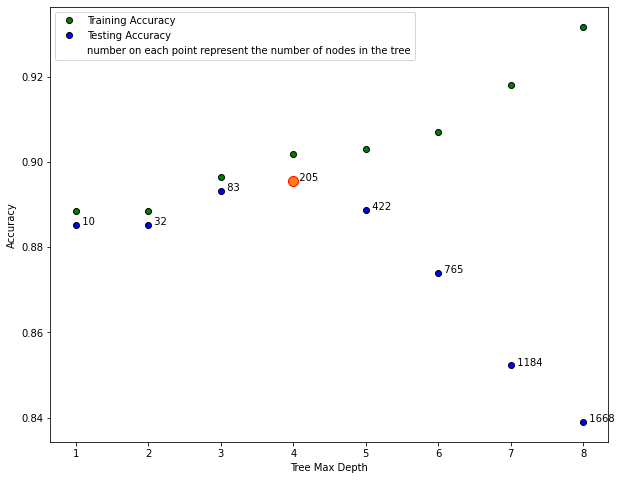

In [21]:
max_depth_arr=[1, 2, 3, 4, 5, 6, 7, 8]
points_to_plot_train=[]
points_to_plot_test=[]
number_of_nodes_in_tree=[]
for max_depth in max_depth_arr:
    tree=build_tree(data=X_train, impurity=calc_entropy,gain_ratio=True, min_samples_split=1, max_depth=max_depth)
    training_accuracy=calc_accuracy(tree,X_train)
    testing_accuracy=calc_accuracy(tree,X_test)
    points_to_plot_train.append(training_accuracy)
    points_to_plot_test.append(testing_accuracy)
    number_of_nodes_in_tree.append(count_nodes(tree))
    
plt.plot(max_depth_arr, points_to_plot_train, 'go', mec='k',label='Training Accuracy')
plt.plot(max_depth_arr, points_to_plot_test, 'bo', mec='k',label='Testing Accuracy')
plt.plot([],[],' ',label="number on each point represent the number of nodes in the tree")
for i in range(len(max_depth_arr)):
    plt.text(max_depth_arr[i],points_to_plot_test[i],"  "+str(number_of_nodes_in_tree[i]))
best_testing_point_by_max_depth=points_to_plot_test.index(max(points_to_plot_test))
plt.plot(max_depth_arr[best_testing_point_by_max_depth],points_to_plot_test[best_testing_point_by_max_depth],marker="o",markersize=10,markeredgecolor="red")
best_testing_point_by_max_depth+=1
plt.ylabel('Accuracy')
plt.xlabel('Tree Max Depth')
plt.legend()
plt.show()

## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

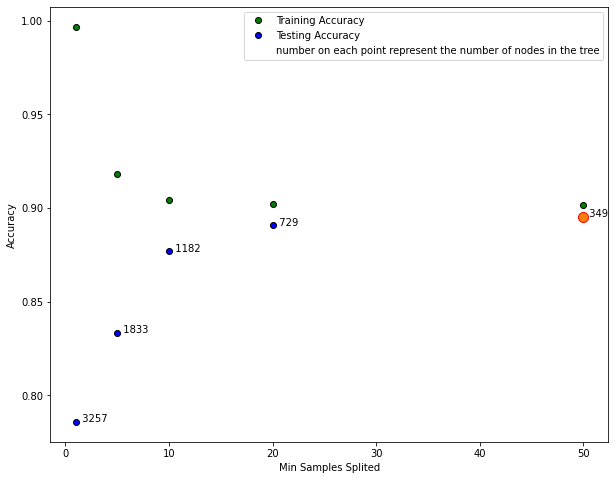

In [22]:
min_samples_split_arr=[1, 5, 10, 20, 50]
points_to_plot_train=[]
points_to_plot_test=[]
number_of_nodes_in_tree=[]
for min_samples in min_samples_split_arr:
    tree=build_tree(data=X_train, impurity=calc_entropy,gain_ratio=True, min_samples_split=min_samples)
    training_accuracy=calc_accuracy(tree,X_train)
    testing_accuracy=calc_accuracy(tree,X_test)
    points_to_plot_train.append(training_accuracy)
    points_to_plot_test.append(testing_accuracy)
    number_of_nodes_in_tree.append(count_nodes(tree))
plt.plot(min_samples_split_arr, points_to_plot_train, 'go', mec='k',label='Training Accuracy')
plt.plot(min_samples_split_arr, points_to_plot_test, 'bo', mec='k',label='Testing Accuracy')
plt.plot([],[],' ',label="number on each point represent the number of nodes in the tree")
for i in range(len(min_samples_split_arr)):
    plt.text(min_samples_split_arr[i],points_to_plot_test[i],"  "+str(number_of_nodes_in_tree[i]))
best_testing_point_by_min_samples_split=points_to_plot_test.index(max(points_to_plot_test))
plt.plot(min_samples_split_arr[best_testing_point_by_min_samples_split],points_to_plot_test[best_testing_point_by_min_samples_split],marker="o",markersize=10,markeredgecolor="red")
best_testing_point_by_min_samples_split=min_samples_split_arr[best_testing_point_by_min_samples_split]
plt.ylabel('Accuracy')
plt.xlabel('Min Samples Splited')
plt.legend()
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [23]:
tree_max_depth=build_tree(data=X_train, impurity=calc_entropy,gain_ratio=True, min_samples_split=1, max_depth=best_testing_point_by_max_depth)
tree_min_samples_split=build_tree(data=X_train, impurity=calc_entropy,gain_ratio=True, min_samples_split=best_testing_point_by_min_samples_split)

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [24]:
# Moved this function to the top, in order to use it in the graphs

print("number of nodes in the pruned tree by depth: "+ str(count_nodes(tree_max_depth)))    
print("number of nodes in the pruned tree by min samples in node: "+ str(count_nodes(tree_min_samples_split)))

number of nodes in the pruned tree by depth: 205
number of nodes in the pruned tree by min samples in node: 349


## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [25]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    if(parent_feature=='ROOT'):
        print("["+str(parent_feature)+", feature=X"+str(node.feature_the_current_node_partitions)+"],")
    elif(len(node.children)==0):
        print("  "*depth+"["+str(parent_feature)+"="+str(node.value_this_node_share)+", leaf]: ["+str(node.labels)+"]")
    else:
        print("  "*depth+"["+str(parent_feature)+"="+str(node.value_this_node_share)+", feature=X"+str(node.feature_the_current_node_partitions)+"],")
    for node1 in node.children:
        print_tree(node1,depth+1,'X'+str(node.feature_the_current_node_partitions),None)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    


print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [26]:
#we see on the graphs that represent the pruning that the tree with max depth of 2 will have 32 nodes and it will be the best accuracy. 

print_tree(build_tree(data=X_train, impurity=calc_entropy,gain_ratio=True, min_samples_split=1, max_depth=2))


[ROOT, feature=X4],
  [X4=a, feature=X2],
    [X2=n, leaf]: [{'e': 33, 'p': 5}]
    [X2=w, leaf]: [{'e': 107, 'p': 7}]
    [X2=y, leaf]: [{'e': 133, 'p': 19}]
  [X4=c, feature=X6],
    [X6=c, leaf]: [{'e': 7, 'p': 63}]
    [X6=w, leaf]: [{'e': 3, 'p': 74}]
  [X4=f, feature=X10],
    [X10=f, leaf]: [{'e': 14, 'p': 91}]
    [X10=k, leaf]: [{'e': 134, 'p': 1037}]
    [X10=s, leaf]: [{'e': 22, 'p': 310}]
  [X4=l, feature=X1],
    [X1=f, leaf]: [{'e': 19, 'p': 1}]
    [X1=s, leaf]: [{'e': 94, 'p': 16}]
    [X1=y, leaf]: [{'e': 159, 'p': 10}]
  [X4=m, feature=X0],
    [X0=f, leaf]: [{'e': 1, 'p': 8}]
    [X0=k, leaf]: [{'e': 1, 'p': 10}]
    [X0=x, leaf]: [{'p': 7}]
  [X4=n, feature=X7],
    [X7=b, leaf]: [{'e': 2197, 'p': 286}]
    [X7=n, leaf]: [{'e': 135, 'p': 58}]
  [X4=p, feature=X0],
    [X0=f, leaf]: [{'e': 7, 'p': 86}]
    [X0=x, leaf]: [{'e': 1, 'p': 89}]
  [X4=s, feature=X13],
    [X13=p, leaf]: [{'e': 12, 'p': 190}]
    [X13=w, leaf]: [{'e': 26, 'p': 190}]
  [X4=y, feature=X1],
  